In [1]:
'스포츠 및 레크레이션 용품 임대업', '여관업', '여행사업', '욕탕업', '육류 소매업', '일반유흥 주점업', '일식 음식점업' '자동차 임대업' '전시 및 행사 대행업','정기 항공 운송업', '중식 음식점업', '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점','택시 운송업''피자 햄버거 샌드위치 및 유사 음식점업', '한식 음식점업', '호텔업', '화장품 및 방향제 소매업', '휴양콘도 운영업',

('스포츠 및 레크레이션 용품 임대업',
 '여관업',
 '여행사업',
 '욕탕업',
 '육류 소매업',
 '일반유흥 주점업',
 '일식 음식점업자동차 임대업전시 및 행사 대행업',
 '정기 항공 운송업',
 '중식 음식점업',
 '차량용 가스 충전업',
 '차량용 주유소 운영업',
 '체인화 편의점',
 '택시 운송업피자 햄버거 샌드위치 및 유사 음식점업',
 '한식 음식점업',
 '호텔업',
 '화장품 및 방향제 소매업',
 '휴양콘도 운영업')

In [20]:
# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [24]:
travel = pd.read_csv("업종별/여행사업.csv", encoding='utf-8', index_col=0,parse_dates=['REG_YYMM'])

In [25]:
print(travel.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47446 entries, 0 to 47445
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   REG_YYMM      47446 non-null  object
 1   CARD_SIDO_NM  47446 non-null  object
 2   CARD_CCG_NM   47446 non-null  object
 3   STD_CLSS_NM   47446 non-null  object
 4   HOM_SIDO_NM   47446 non-null  object
 5   HOM_CCG_NM    47175 non-null  object
 6   AGE           47446 non-null  object
 7   SEX_CTGO_CD   47446 non-null  int64 
 8   FLC           47446 non-null  int64 
 9   CSTMR_CNT     47446 non-null  int64 
 10  AMT           47446 non-null  int64 
 11  CNT           47446 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.7+ MB
None


In [5]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [26]:
#안쓰는 컬럼 드랍
df=travel.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'STD_CLSS_NM'], axis=1)

In [27]:
df = df.fillna('')
df['year'] = df['REG_YYMM'].apply(lambda x: grap_year(x))
df['month'] = df['REG_YYMM'].apply(lambda x: grap_month(x))

In [28]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47446 entries, 0 to 47445
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   REG_YYMM      47446 non-null  object
 1   CARD_SIDO_NM  47446 non-null  object
 2   HOM_SIDO_NM   47446 non-null  object
 3   AGE           47446 non-null  object
 4   SEX_CTGO_CD   47446 non-null  int64 
 5   FLC           47446 non-null  int64 
 6   CSTMR_CNT     47446 non-null  int64 
 7   AMT           47446 non-null  int64 
 8   CNT           47446 non-null  int64 
 9   year          47446 non-null  int64 
 10  month         47446 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 4.3+ MB
None
  REG_YYMM CARD_SIDO_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  CSTMR_CNT    AMT  \
0   201901           강원          강원  50s            1    4          5  90000   
1   201901           강원          강원  60s            1    5          4  33000   
2   201901           강원          강원  40s          

In [29]:
df.CARD_SIDO_NM.unique()
#16개 지역 (세종이 없음!!!)

array(['강원', '경기', '경남', '경북', '광주', '대구', '부산', '서울', '울산', '인천', '전남',
       '전북', '제주', '충남', '대전', '충북'], dtype=object)

In [30]:
df.HOM_SIDO_NM.unique()
#17개

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '인천', '전북',
       '충남', '충북', '세종', '울산', '전남', '제주'], dtype=object)

CARD_SIDO_NM
대전         3030000
충북         8064650
울산        11946500
경북        14580600
전북        20519170
경남        28345800
광주        34138944
인천        38842200
대구        55275600
전남        82440200
충남       195329500
부산       461080937
제주       535102735
경기       663212820
강원      1776928180
서울    105087859446
Name: AMT, dtype: int64


Text(0.5, 1.0, '지역별 AMT')

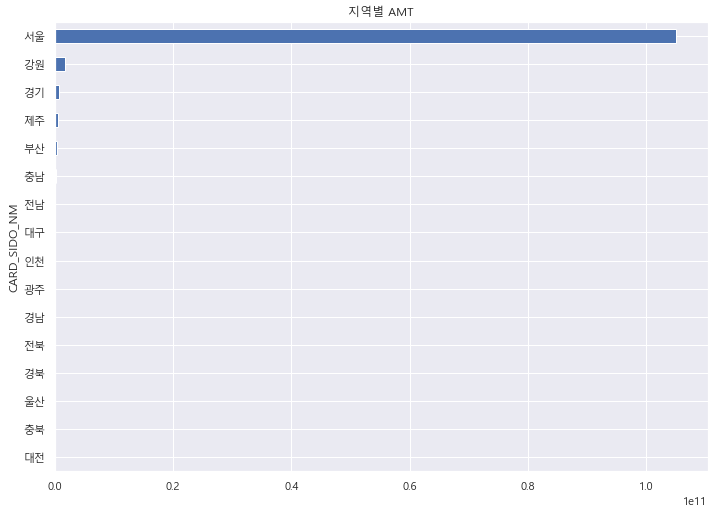

In [57]:
df1 = df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values()
print(df1)
df1.plot(kind="barh")
plt.title("지역별 AMT")

-거의 서울 단독

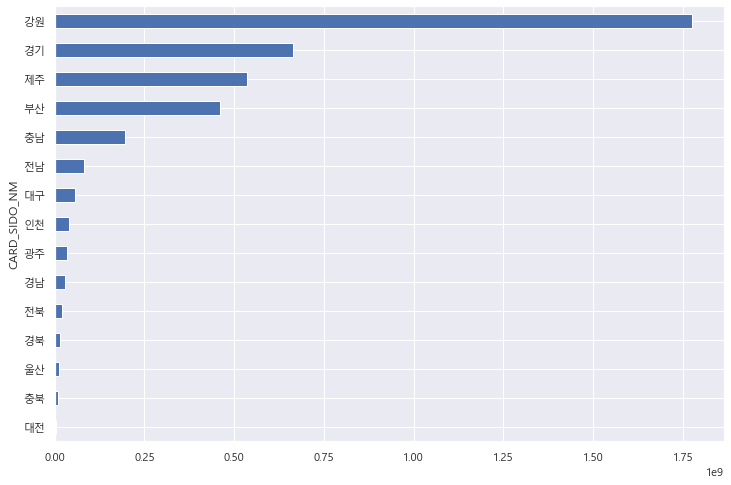

In [54]:
#서울 제외한 그래프
df1_1= df1[:15]
df1_1.plot(kind="barh", figsize=(12,8))

REG_YYMM
201901    13039593948
201902     7958997512
201903     8066920544
201904     8355359309
201905     8669547784
201906     7170653213
201907    10764931886
201908     7741703949
201909     6875853030
201910     6874865654
201911     6405210212
201912     8024406219
202001     7621802855
202002     1026582986
202003      420268181
Name: AMT, dtype: int64


Text(0.5, 1.0, '기간별 AMT')

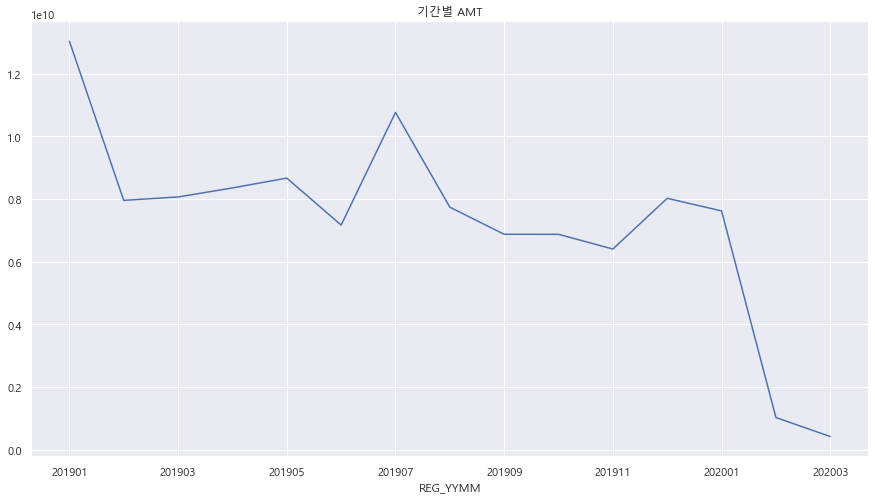

In [55]:
df2 = df.groupby('REG_YYMM')['AMT'].sum()
print(df2)
df2.plot(figsize=(15,8))
plt.title("기간별 AMT")

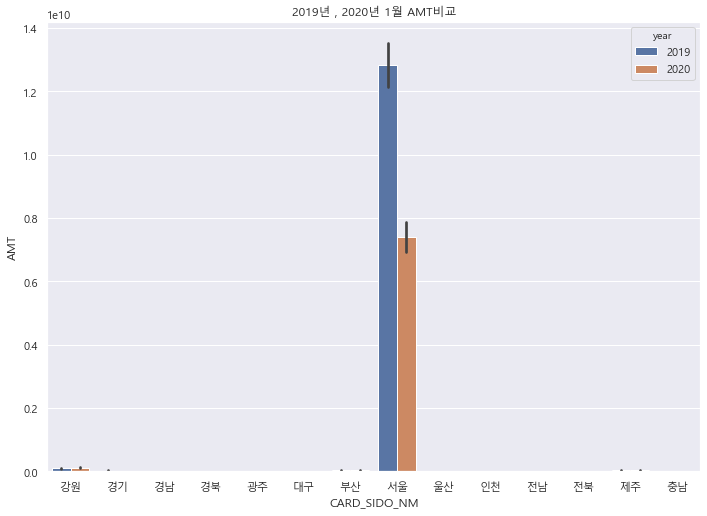

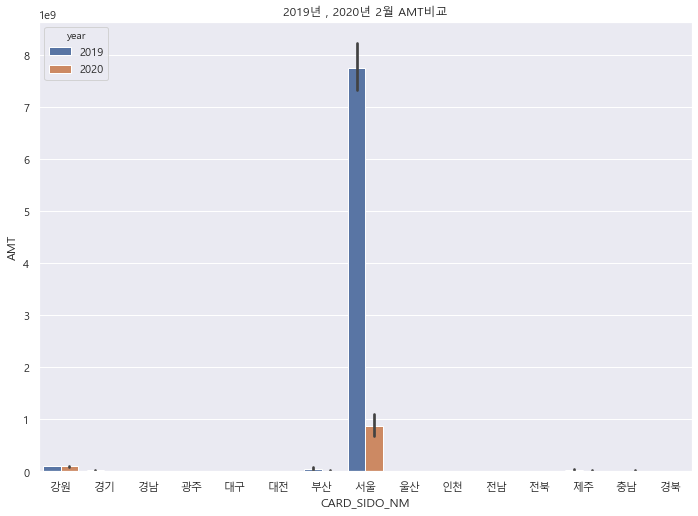

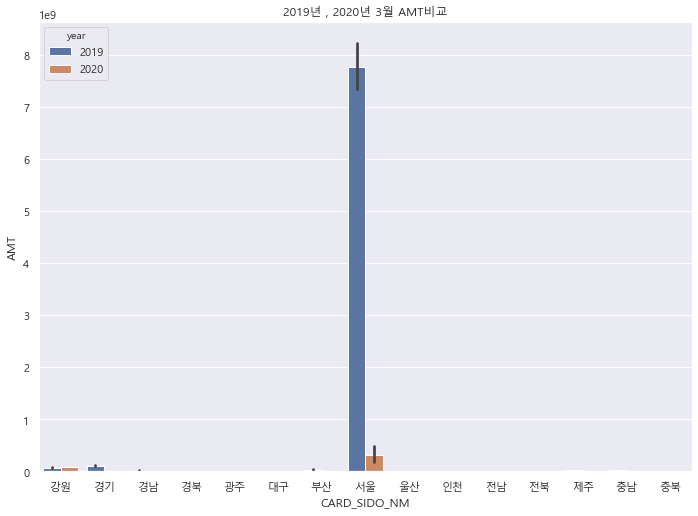

In [56]:
for i in range(1, 4):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    df_month = df[df.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

In [61]:
df_noS = df[df['CARD_SIDO_NM']!='서울']

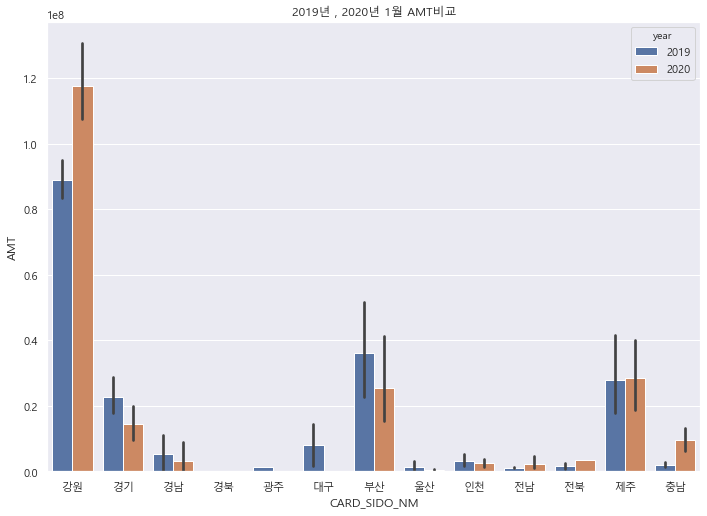

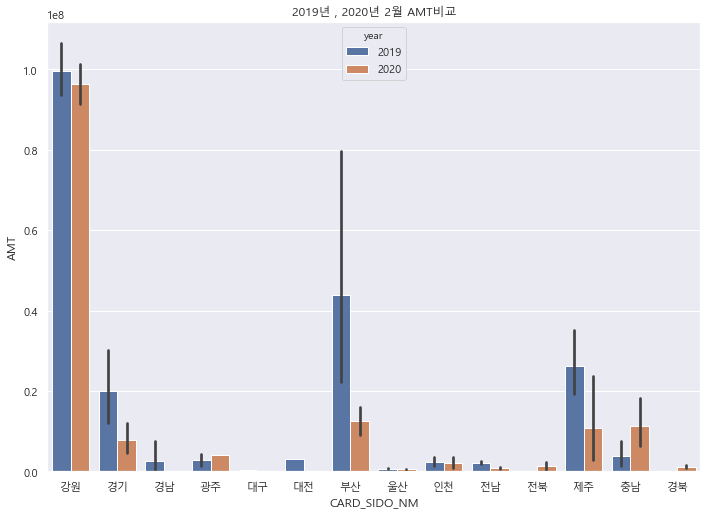

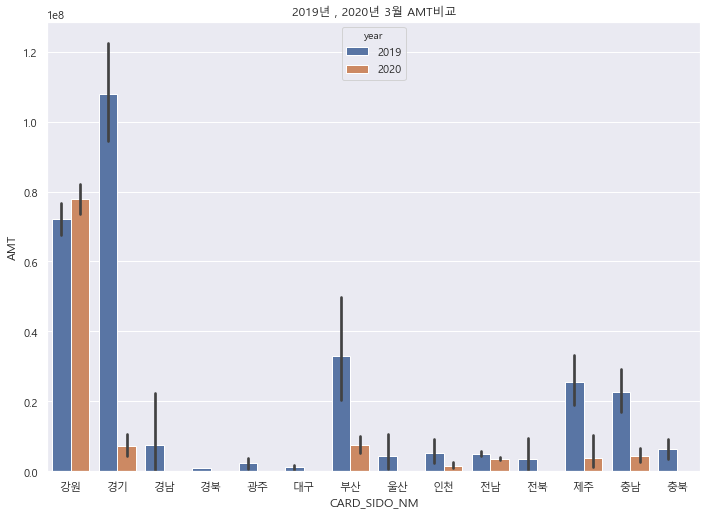

In [63]:
#서울 제외...
for i in range(1, 4):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    df_month = df_noS[df_noS.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

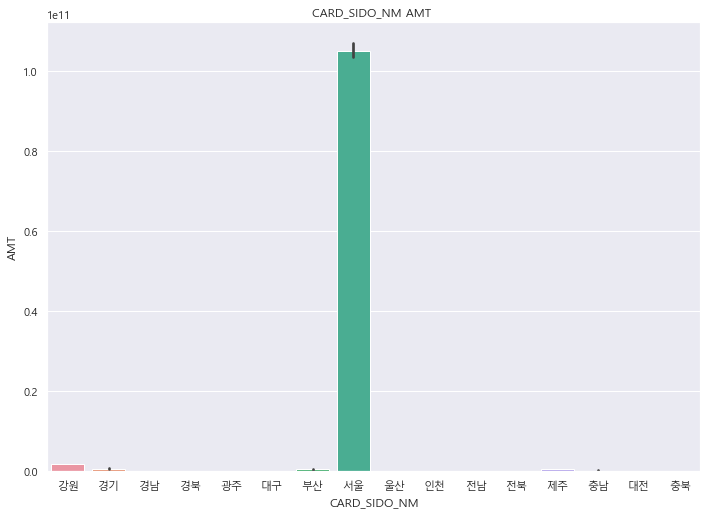

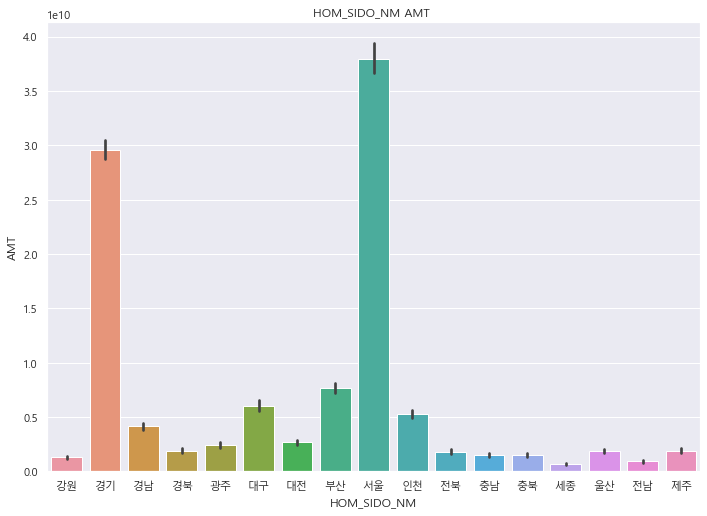

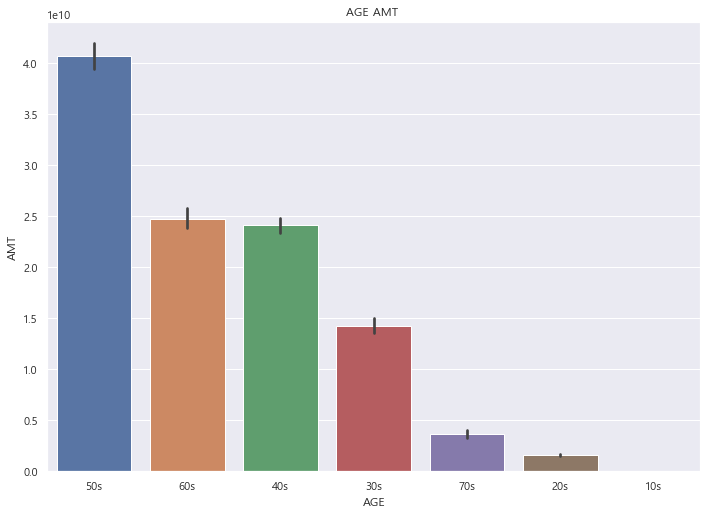

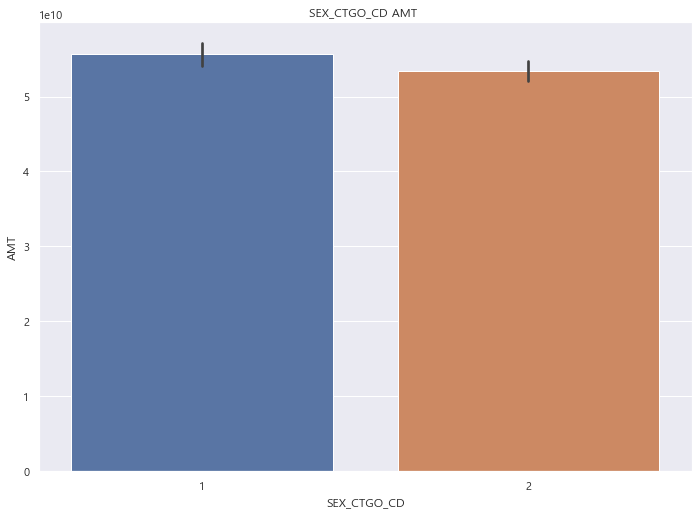

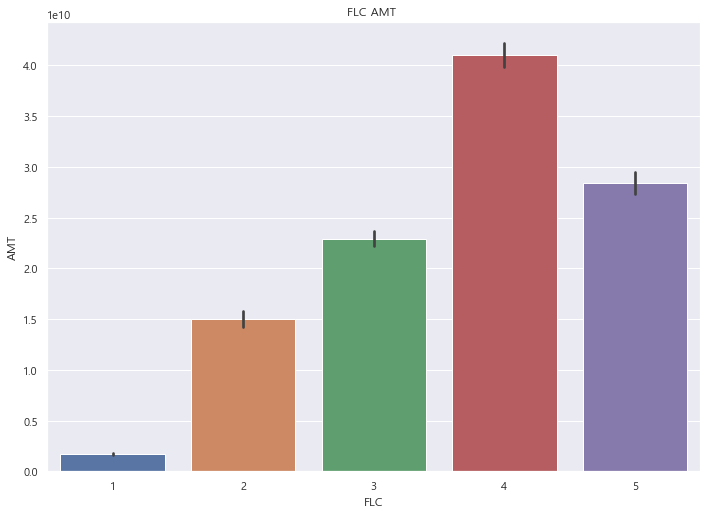

In [64]:

cols = ['CARD_SIDO_NM', 'HOM_SIDO_NM','AGE','SEX_CTGO_CD', 'FLC']
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df, y = 'AMT', x = val, orient = 'v',estimator = sum)
    plt.title(val +' AMT ')
    plt.show()

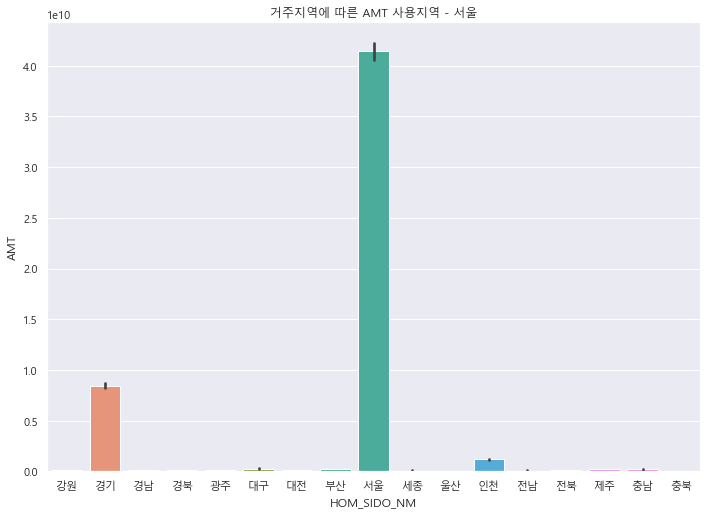

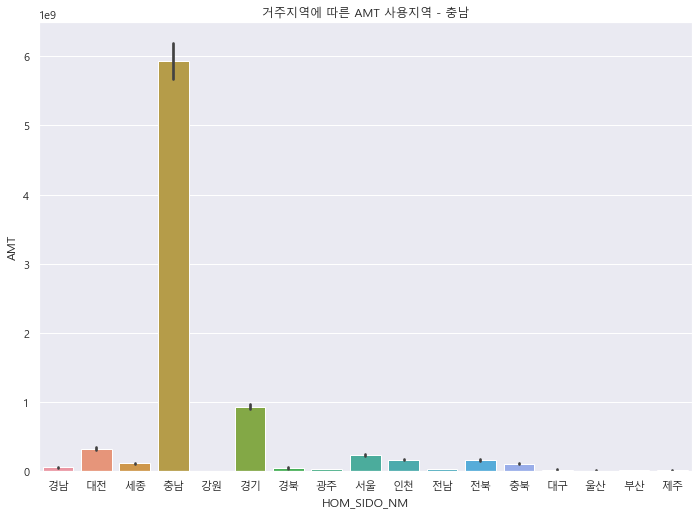

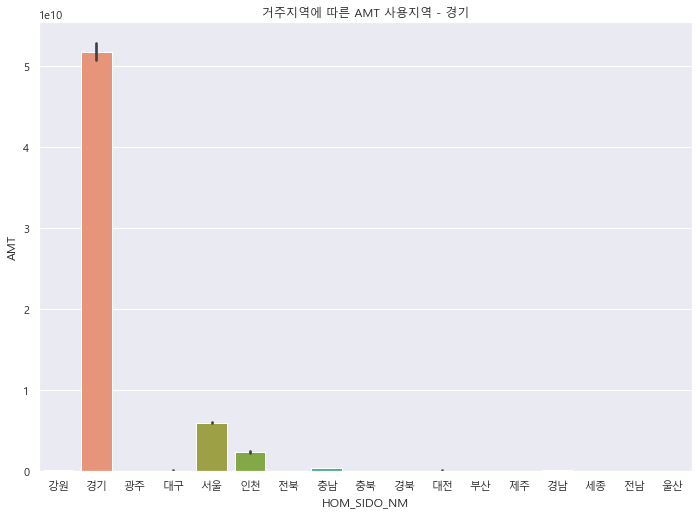

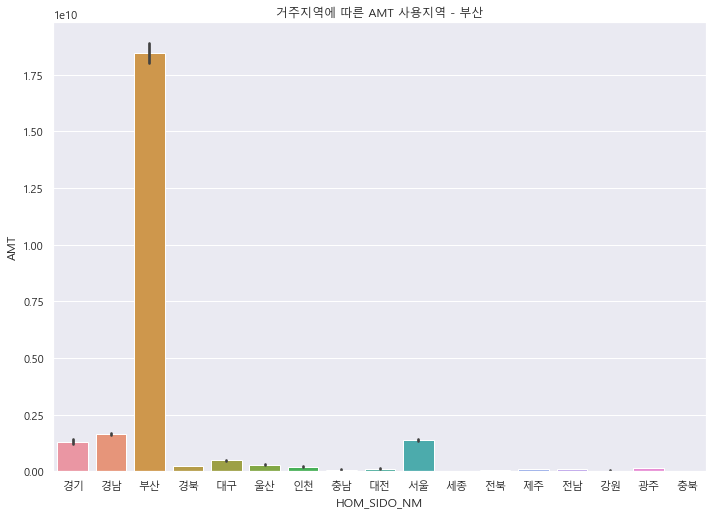

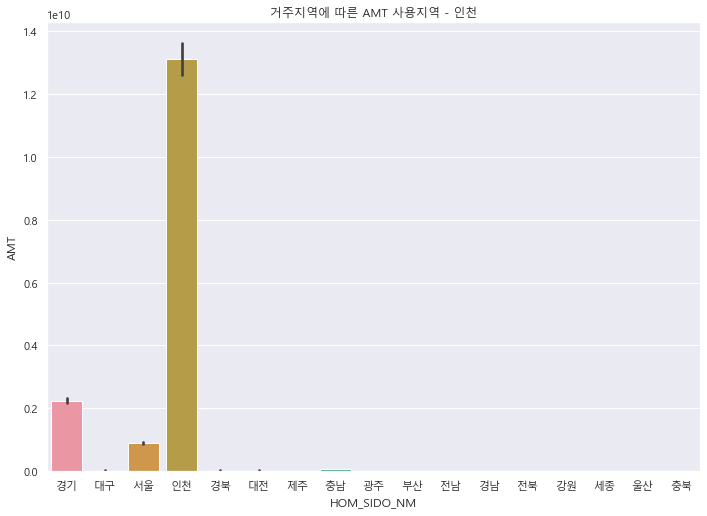

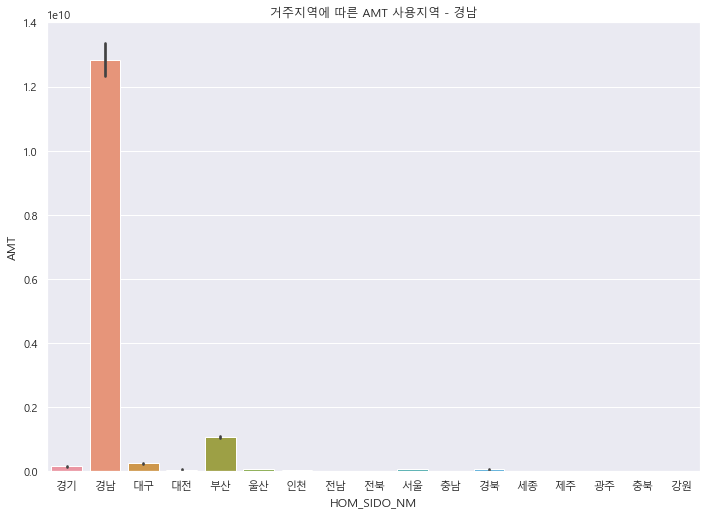

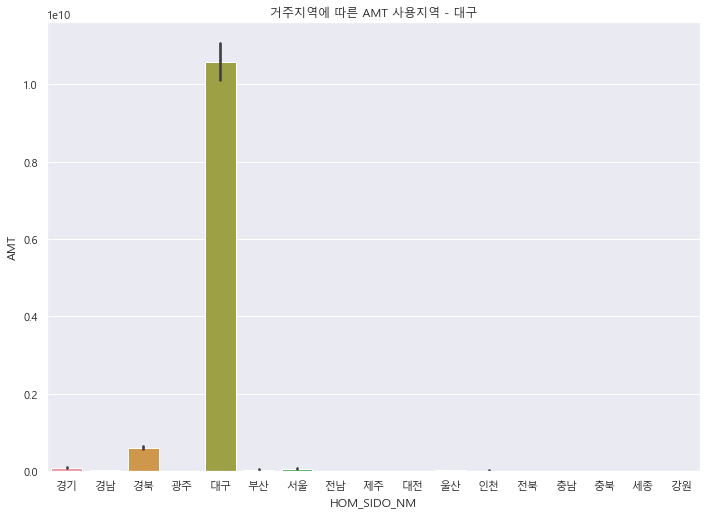

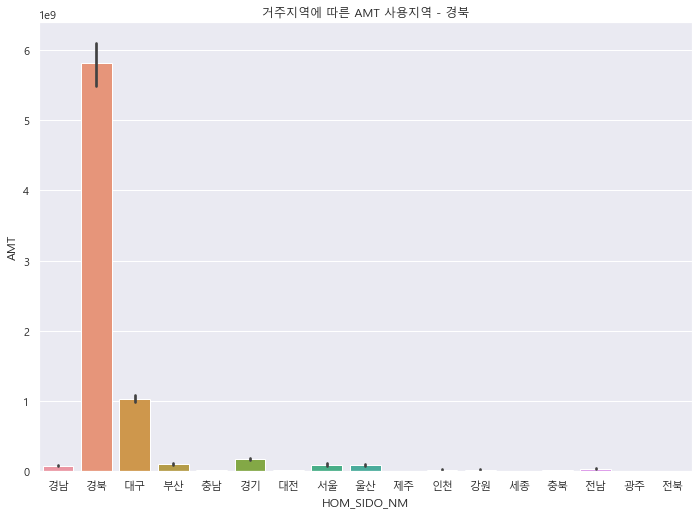

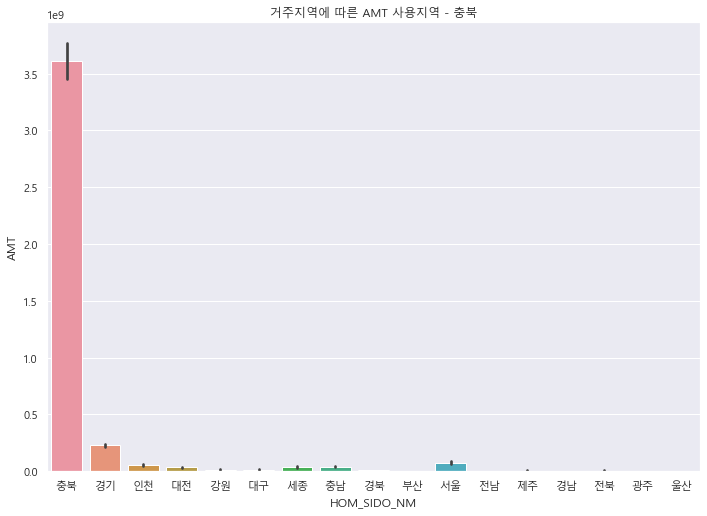

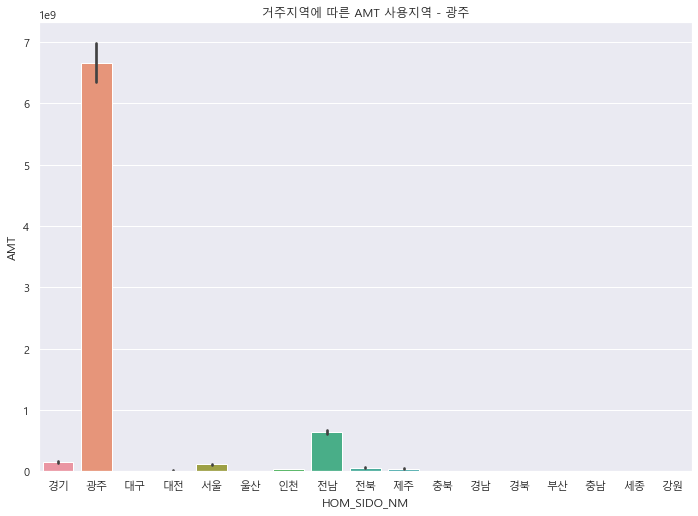

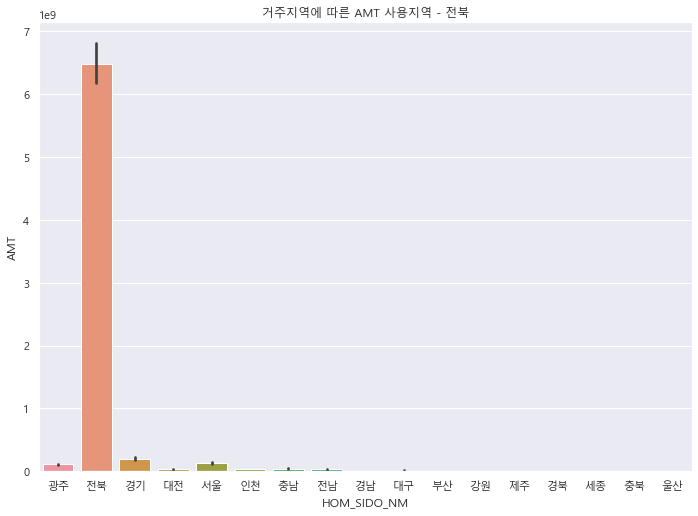

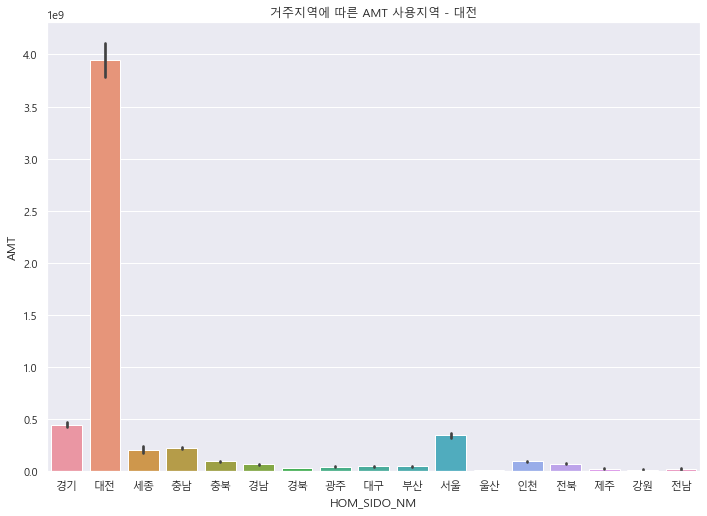

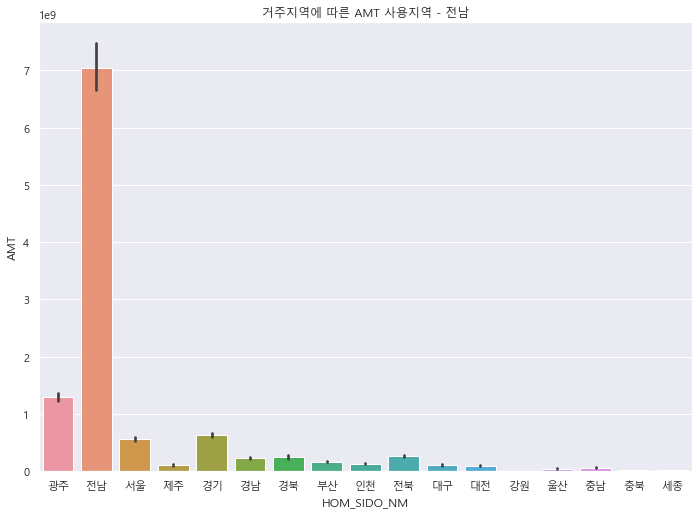

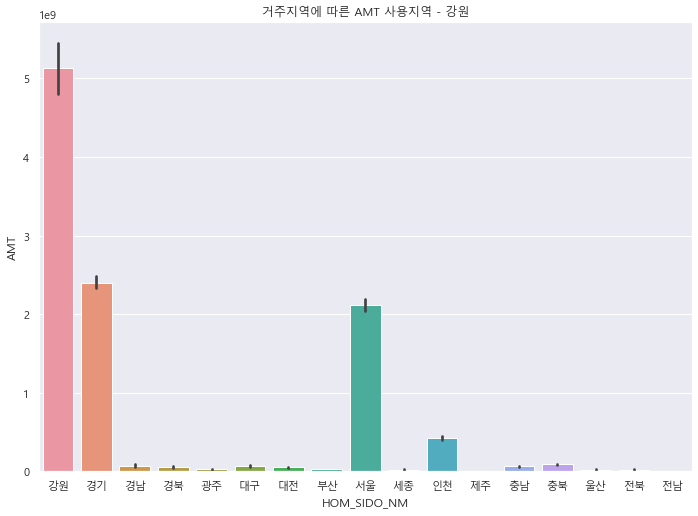

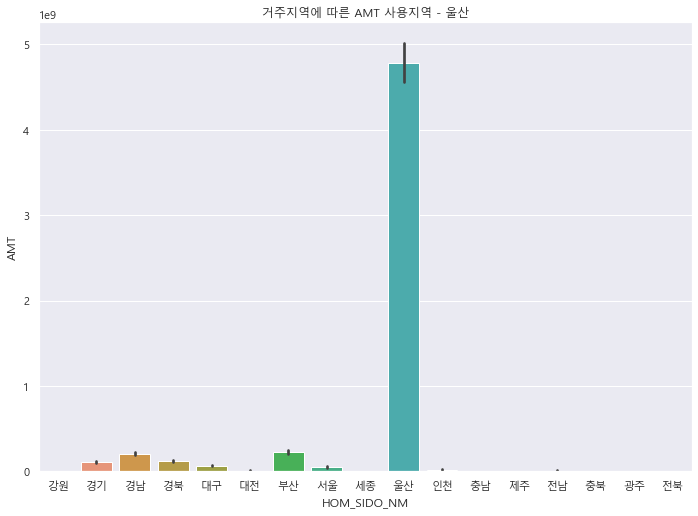

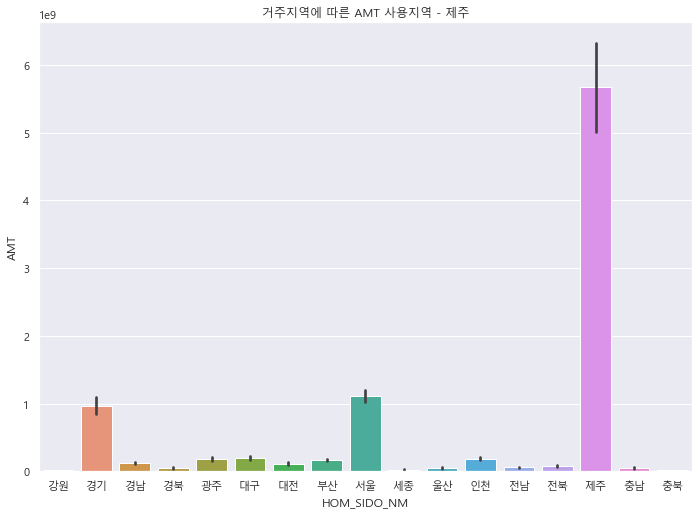

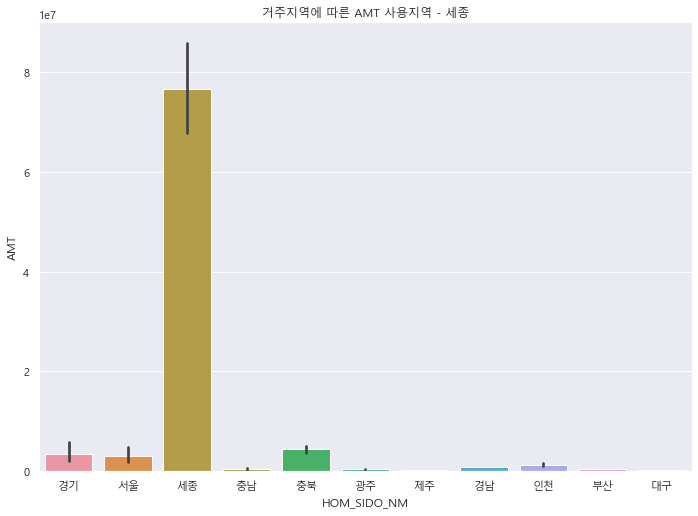

In [19]:
cols = ['서울', '충남', '경기', '부산', '인천','경남', '대구', '경북', '충북', '광주','전북','대전', '전남', '강원', '울산', '제주', '세종']
    
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df[df.CARD_SIDO_NM == val], x = 'HOM_SIDO_NM', y = 'AMT',  estimator = sum)
    plt.title('거주지역에 따른 AMT 사용지역 - ' + val)
    plt.show()